In [30]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
raw_data = pd.read_csv('walmart_data.csv')

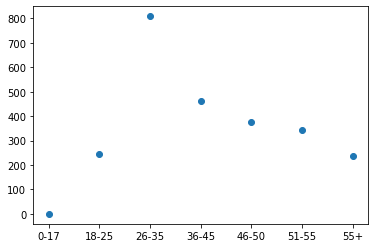

In [32]:
# Exploring relationship between age and marital_status

# Take only the Age, Marital_Status, and User_ID columns from the data
age_marriage_data = raw_data[["Age", "Marital_Status", "User_ID"]].drop_duplicates()

# Group together all entries with the same age and sum their corresponding values
marriage_count = age_marriage_data.groupby("Age").sum().reset_index()

# Create a scatter plot of the sums of Marital_Status vs the Age groups
plt.scatter(marriage_count["Age"], marriage_count["Marital_Status"])

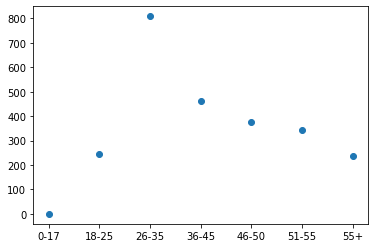

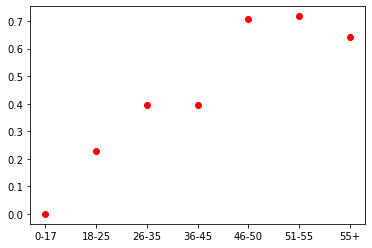

In [34]:
# Normalize the data because there are way more people aged 26-35

# Count the total number of unique people in each age group
# Group by the Age, select the User_ID column, and count unique User_IDs
age_counts = raw_data.groupby("Age")["User_ID"].nunique()

# Add the total number of people per age group to the marriage_count table
marriage_count["Total_People"] = marriage_count["Age"].map(age_counts)

# Divide the marriage values by the number of people in each group (normalize)
marriage_count["Normalized_Marriages"] = marriage_count["Marital_Status"] / marriage_count["Total_People"]

# Scatter plot of raw marriage count
plt.scatter(marriage_count["Age"], marriage_count["Marital_Status"])
plt.show()

# Scatter plot of normalized marriage rate
plt.scatter(marriage_count["Age"], marriage_count["Normalized_Marriages"], color="red")
plt.show()

Age    Gender
0-17   F           78
       M          140
18-25  F          287
       M          782
26-35  F          545
       M         1508
36-45  F          333
       M          834
46-50  F          182
       M          349
51-55  F          142
       M          339
55+    F           99
       M          273
Name: User_ID, dtype: int64
Age    Gender
0-17   F           0
       M           0
18-25  F          70
       M         174
26-35  F         225
       M         584
36-45  F         131
       M         331
46-50  F         133
       M         242
51-55  F          93
       M         252
55+    F          67
       M         172
Name: Marital_Status, dtype: int64


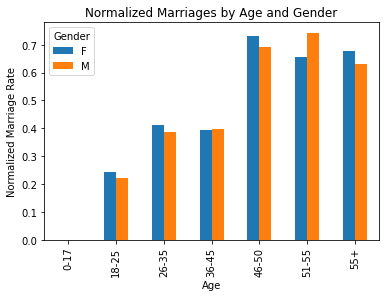

In [43]:
# Investingating by gender

# Gather the appropriate columns, drop duplicates of users
age_marriage_data = raw_data[["Age", "Marital_Status", "Gender", "User_ID"]].drop_duplicates()

# Count the unique users per Age+Gender group
age_gender_counts = age_marriage_data.groupby(["Age", "Gender"])["User_ID"].nunique()
print(age_gender_counts)

# Create groups of Age and Gender with a sum of the Marriage_Status
marriage_count = age_marriage_data.groupby(["Age", "Gender"])["Marital_Status"].sum()
print(marriage_count)

# Convert to DataFrame
marriage_count = marriage_count.to_frame().reset_index()

# Merge total unique users per Age-Gender
marriage_count["Total_People"] = marriage_count.set_index(["Age", "Gender"]).index.map(age_gender_counts)

# Normalize by dividing marriages by total unique users per group
marriage_count["Normalized_Marriages"] = marriage_count["Marital_Status"] / marriage_count["Total_People"]

# Pivot table for bar plot
marriage_pivot = marriage_count.pivot(index="Age", columns="Gender", values="Normalized_Marriages")

# Plot normalized data
marriage_pivot.plot(kind="bar", title="Normalized Marriages by Age and Gender")
plt.ylabel("Normalized Marriage Rate")
plt.show()

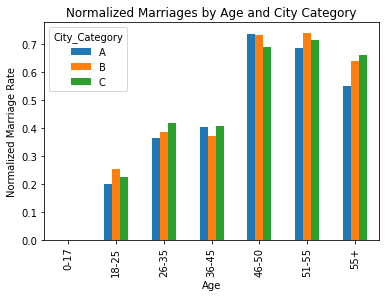

In [44]:
# Extract relevant columns and remove duplicate users
age_marriage_data = raw_data[["Age", "Marital_Status", "City_Category", "User_ID"]].drop_duplicates()

# Count unique users per Age-City_Category group
age_city_counts = age_marriage_data.groupby(["Age", "City_Category"])["User_ID"].nunique()

# Sum marital status counts per Age-City_Category group
marriage_count = age_marriage_data.groupby(["Age", "City_Category"])["Marital_Status"].sum()

# Convert to DataFrame
marriage_count = marriage_count.to_frame().reset_index()

# Merge total unique users per Age-City_Category
marriage_count["Total_People"] = marriage_count.set_index(["Age", "City_Category"]).index.map(age_city_counts)

# Normalize by dividing marriages by total unique users per group
marriage_count["Normalized_Marriages"] = marriage_count["Marital_Status"] / marriage_count["Total_People"]

# Pivot table for bar plot
marriage_pivot = marriage_count.pivot(index="Age", columns="City_Category", values="Normalized_Marriages")

# Plot normalized data
marriage_pivot.plot(kind="bar", title="Normalized Marriages by Age and City Category")
plt.ylabel("Normalized Marriage Rate")
plt.show()